In [82]:
from EMAN2 import EMNumPy

In [81]:
from sp_utilities import combine_params2, inverse_transform2, get_params2D, set_params2D
from sp_alignment import ormq, ornq
from global_def import *
from EMAN2 import EMNumPy
import matplotlib.pyplot as plt
import h5py

In [58]:
import numpy as np 
def visualise_images(X, n_images, n_columns, randomise=False, cmap=plt.cm.Greys_r ):
    indices = np.arange(X.shape[0])
    if randomise:
        np.random.shuffle(indices)
    indices = indices[:n_images]
    n_rows = np.ceil(n_images / n_columns)
    fig = plt.figure(figsize=(2*n_columns, 2*n_rows))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # plot the digits: each image is 8x8 pixels
    for i, e in enumerate(indices):
        ax = fig.add_subplot(n_rows, n_columns, i + 1, xticks=[], yticks=[])
        ax.imshow(X[e], cmap=cmap, interpolation='nearest')

In [74]:
#filename = 'faces.hdf'
#filename = 'rib_images.hdf'
filename = '../out4/aqm009.hdf'
size=50

In [75]:
f = h5py.File(filename, 'r')
hdf = f['MDF'][u'images']
imgs = np.array(f['MDF'][u'images']['0']['image'])
imgs = np.expand_dims(imgs, axis=0)
for i, img in enumerate(hdf.items()):
    if i >0 and i < size:
        img = np.expand_dims(np.array(img[1]['image']), axis=0)
        imgs = np.concatenate((imgs,img), axis=0)

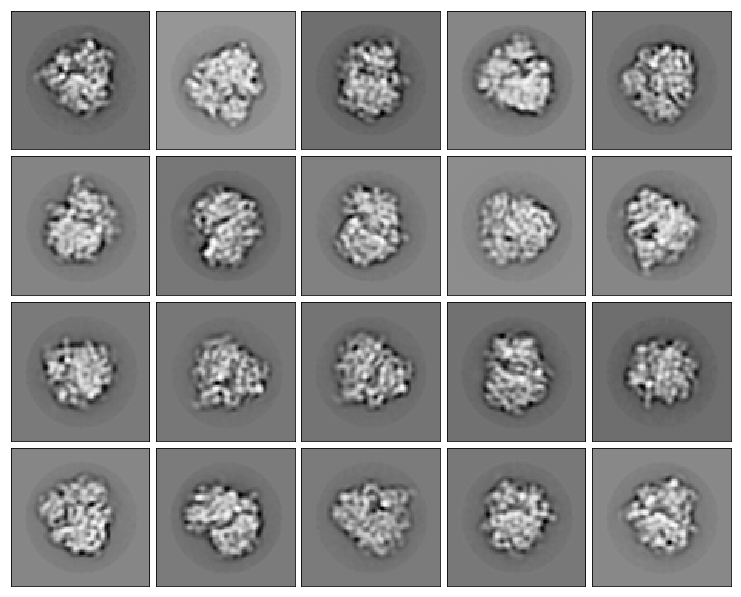

In [73]:
visualise_images(imgs, 20, 5)

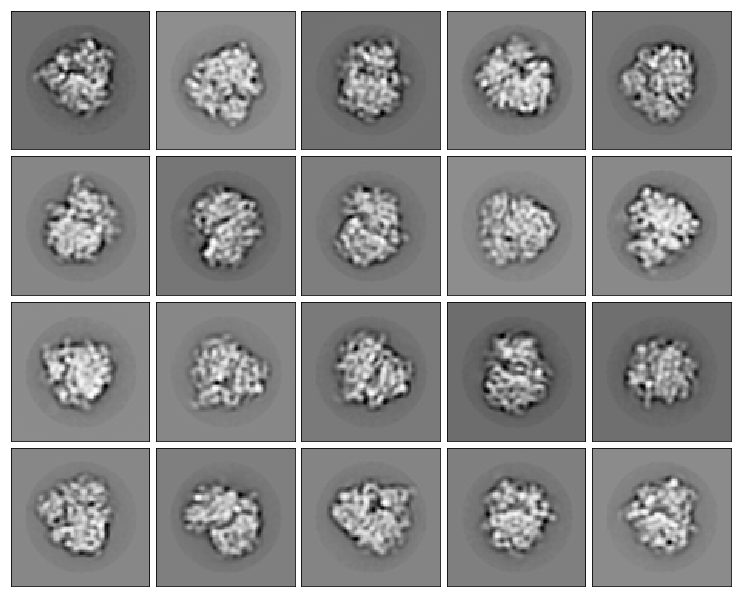

In [76]:
visualise_images(imgs, 20, 5)

In [85]:
import sparx as spx
refi = [spx.model_blank(130, 130) for i in range(3)]

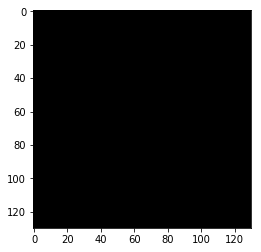

In [86]:
plt.imshow(EMNumPy.em2numpy(refi[0]), cmap='gray')

In [87]:
for j in range(3):  refi[j].write_image("blank.hdf", j)

In [92]:
from isac import *
refi = generate_random_averages(data, 3)

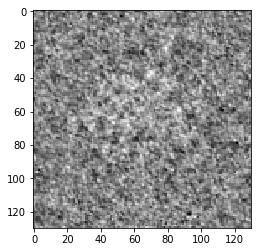

In [94]:
plt.imshow(EMNumPy.em2numpy(refi[0]), cmap='gray')

In [93]:
for j in range(3):  refi[j].write_image("random.hdf", j)

In [15]:
ali_params="xform.align2d"

In [90]:
data = EMData.read_images("../rib_images22.hdf")

In [51]:
refi

[[<libpyEMData2.EMData at 0x7fabc3f56d70>,

In [41]:
refi = []
for i in range(5):
    refi.append([data[i], data[5+i]])

In [50]:
[a[0] for a in refi]

In [77]:
ref = EMData.read_images("../rib_ref.hdf")
ref[0].write_image("single.hdf", 0)

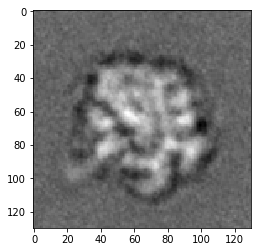

In [78]:
plt.imshow(EMNumPy.em2numpy(ref[0]), cmap='gray')

In [79]:
import EMNumPy

ImportError: No module named EMNumPy

In [ ]:
from sp_fundamentals   import   rot_shift2D, fshift  
temp = rot_shift2D(data[im-image_start], alphan, sxn, syn, mn)


In [25]:
alpha, sx, sy, mirror, dummy = get_params2D(data[1], ali_params)
alpha, sx, sy, mirror, dummy

(141.42257753434927, 0.47458410263061523, 4.216013431549072, 0, 1.0)

In [26]:
alpha, sx, sy, dummy         = combine_params2(alpha, sx, sy, mirror, 0.0, -3, -1, 0)
alpha, sx, sy, dummy

(141.42257753434927, -2.5254158973693848, 3.2160134315490723, 0)

In [28]:
a, sxi, syi, _  = inverse_transform2(alpha, sx, sy)
a, sxi, syi

(218.5774203360948, 0.031129680573940277, 4.0889482498168945)

In [33]:
for i in range(5):
    a = np.random.random((5,5))
    Ea = EMNumPy.numpy2em(a)
    Ea.write_image("../simple_images.hdf", i)

In [34]:
a = np.random.random((5,5))
Ea = EMNumPy.numpy2em(a)
Ea.write_image("../simple_ref.hdf", 0)

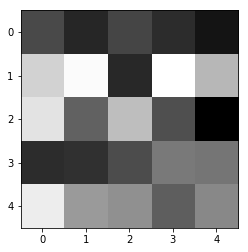

In [35]:
plt.imshow(EMNumPy.em2numpy(Ea), cmap='gray')

In [45]:
for i in range(3):
    a = np.random.random((5,5))
    Ea = EMNumPy.numpy2em(a)
    Ea.write_image("../simple_ref2.hdf", i)

In [48]:
data = EMData.read_images("../simple_images.hdf")

[[0.3565738  0.13153951 0.18088497 0.46575722 0.5498349 ]
 [0.74649066 0.3607385  0.6179791  0.18500052 0.6649938 ]
 [0.74017745 0.39473855 0.44726822 0.759875   0.22399314]
 [0.6986629  0.26799315 0.43235767 0.73161954 0.2915621 ]
 [0.71782374 0.05689911 0.65038383 0.6391495  0.5625148 ]]


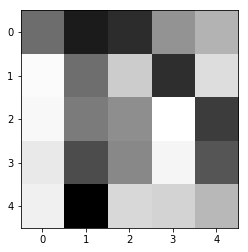

[[0.11304642 0.9382727  0.57362247 0.7880486  0.09282805]
 [0.1768326  0.33772773 0.6822461  0.5108848  0.33161387]
 [0.94575137 0.95048815 0.31060258 0.9077524  0.8719965 ]
 [0.91368264 0.02951216 0.10636113 0.25517052 0.70675874]
 [0.38795173 0.7091465  0.8930407  0.5795177  0.7362678 ]]


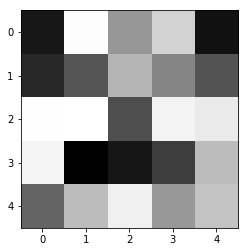

[[0.9897592  0.31477603 0.44087493 0.39302543 0.84977454]
 [0.87458605 0.55215013 0.888548   0.59015286 0.15499848]
 [0.7650771  0.37606463 0.6986456  0.7317616  0.70000273]
 [0.15652454 0.7708294  0.29266322 0.5939272  0.6072378 ]
 [0.61848605 0.8495274  0.33666715 0.45868573 0.7480425 ]]


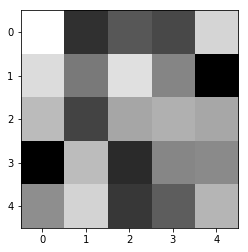

[[0.882709   0.6812306  0.81218284 0.3431327  0.40390125]
 [0.8774869  0.05009893 0.8741812  0.15102501 0.22079296]
 [0.77184045 0.8836661  0.00524875 0.31898105 0.70533967]
 [0.0798469  0.7501231  0.96158063 0.7101296  0.8761176 ]
 [0.40510994 0.6362449  0.79879653 0.19707774 0.44275546]]


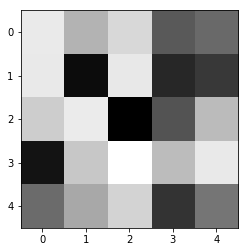

[[0.7391387  0.7214608  0.71654946 0.5065115  0.76508754]
 [0.19161639 0.10931133 0.5991163  0.9790516  0.11068589]
 [0.42297944 0.06938376 0.5309204  0.31482074 0.4402414 ]
 [0.5147218  0.03902631 0.63740754 0.0505788  0.60894954]
 [0.411757   0.26798093 0.9669397  0.52771026 0.66716063]]


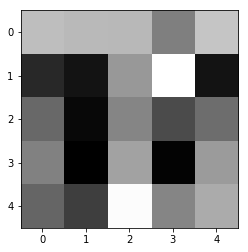

In [49]:
for i in range(5):
    plt.imshow(EMNumPy.em2numpy(data[i]), cmap='gray')
    print(EMNumPy.em2numpy(data[i]))
    plt.show()

In [41]:
data = EMData.read_images("../simple_ref.hdf")

In [80]:
print(EMNumPy.em2numpy(data[0]))

[[0.3565738  0.13153951 0.18088497 0.46575722 0.5498349 ]
 [0.74649066 0.3607385  0.6179791  0.18500052 0.6649938 ]
 [0.74017745 0.39473855 0.44726822 0.759875   0.22399314]
 [0.6986629  0.26799315 0.43235767 0.73161954 0.2915621 ]
 [0.71782374 0.05689911 0.65038383 0.6391495  0.5625148 ]]


In [46]:
data = EMData.read_images("../simple_ref2.hdf")

[[4.75811601e-01 3.47791672e-01 7.29480991e-04 9.87190902e-01
  4.57117945e-01]
 [8.84656701e-03 4.67755824e-01 7.42539525e-01 5.96543193e-01
  5.99932313e-01]
 [9.63325858e-01 1.01046644e-01 1.39507487e-01 8.12412977e-01
  9.50463295e-01]
 [3.71085852e-02 7.79597700e-01 7.44429231e-01 2.83279300e-01
  1.14987329e-01]
 [3.27280968e-01 4.30934876e-01 7.15735853e-01 4.20561552e-01
  1.00519098e-01]]


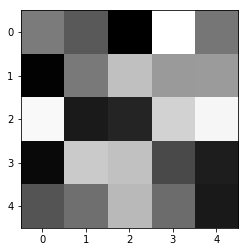

[[0.982034   0.8550926  0.5053519  0.84479755 0.7360131 ]
 [0.9132101  0.57423466 0.5261666  0.87830055 0.6725715 ]
 [0.05189894 0.2602508  0.6137334  0.9376655  0.7751875 ]
 [0.6152516  0.39754844 0.64898986 0.3330606  0.19043553]
 [0.9400422  0.9664655  0.18544626 0.20235163 0.5875116 ]]


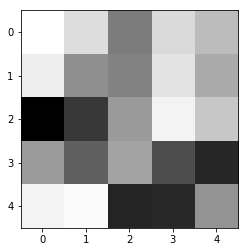

[[0.78331167 0.9857783  0.21120119 0.75512666 0.23888251]
 [0.5028544  0.25574848 0.5978704  0.8786064  0.19195789]
 [0.7706881  0.02169373 0.18460926 0.29321975 0.92370975]
 [0.8769352  0.13422677 0.90071166 0.16204084 0.99170667]
 [0.82954276 0.42386356 0.54241294 0.43996727 0.6445376 ]]


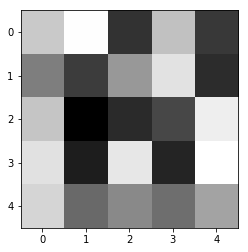

In [47]:
for i in range(3):
    plt.imshow(EMNumPy.em2numpy(data[i]), cmap='gray')
    print(EMNumPy.em2numpy(data[i]))
    plt.show()

In [50]:
print(3,5)

(3, 5)
